# EN3150 Assignment 01 - Learning from data and related challenges and linear models for regression

### 1 Linear regression impact on outliers

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection as  model_selection
import pandas as pd

##### **2. Plotting the data**

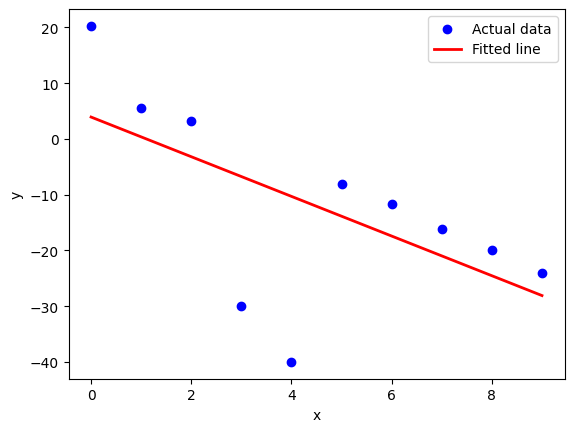

In [ ]:
# Define the feature variable
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],dtype=float).reshape(-1, 1)
# Define the target variable
y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03], dtype=float)

# Create the model
model = linear_model.LinearRegression()

# Train the model
model.fit(x, y)

# Plot the results
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, model.predict(x), color='red', linewidth=2, label='Fitted line')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

##### **4. Finding the loss function values**

In [ ]:
# Define models
def model1(x):
  return -4 * x + 12

def model2(x):
  return -3.55 * x + 3.91

# Robust loss function
def robust_loss(y_true, y_pred, beta):
    errors_sq = (y_true - y_pred)**2
    loss_per_sample = errors_sq / (errors_sq + beta**2)
    return np.mean(loss_per_sample)  # average over N

# Beta values
betas = [1, 1e-6, 1000]

# Calculate losses
for beta in betas:
    loss1 = robust_loss(y, model1(x), beta)
    loss2 = robust_loss(y, model2(x), beta)
    print(f"β = {beta}")
    print(f"Model 1 Loss: {loss1:.6f}")
    print(f"Model 2 Loss: {loss2:.6f}")
    print()

β = 1
Model 1 Loss: 0.929811
Model 2 Loss: 0.949055

β = 1e-06
Model 1 Loss: 1.000000
Model 2 Loss: 1.000000

β = 1000
Model 1 Loss: 0.000461
Model 2 Loss: 0.000396



##### **5. Choosing a Suitable β to Mitigate Outliers**

If β =1
* |e| << β, loss ≈ e^2/β^2 - This has good sensitivity for inliers.
* |e| >> β, loss ≈ 1 - This reduces the effect from large residuals, i.e. outliers.

If β = 1000, loss ≈ e^2/β^2 for all ponits - As the Minimum Squared Error of outliers are high, the effect of outliers are high here.

If β = 10^(-6), loss ≈ 1 for every non zero point - As all points contribute by 1, this looses magnitude information and useful gradient. The real structure will be ignored here.

As β =1 sets the transition near small values, so inliers fit well and outliers are saturated, β =1 is the suitable value to migitate the impact of outliers.
<br>
<br>

##### **6. Selecting the best model**

As model 1 gave the lower loss value for β = 1, it is the most suitable model among the 2.
<br>
<br>


##### **7. How this robust estimator reduces the impact of the outliers**
The robust estimator modifies the standard squared error loss by dividing it by (𝑒^2 + 𝛽^2), where e is the residual. For small residuals (inliers), 𝑒^2 << 𝛽^2, and the loss behaves similarly to the mean squared error, giving these points full influence in determining the model parameters. For large residuals (outliers), 𝑒^2 >> 𝛽^2, and the loss value approaches 1 and no longer grows with the residual magnitude. This “saturation” effect means that very large errors contribute only a limited amount to the total loss, preventing them from dominating the fitting process. As a result, the model focuses more on fitting the majority of the data (inliers) rather than being heavily influenced by extreme points (outliers).
<br>
<br>

##### **8. Another loss function that can be used for this robust estimator**

Huber Loss Function <br>
This combines the best parts of Mean Squared Error (MSE) and Mean Absolute Error (MAE). For small errors (∣e∣≤δ), it uses MSE, which is quadratic. So, it is sensitive to small deviations and fits inliers well. For large errors (∣e∣>δ), it uses MAE, which is linear. So, it reduces the effect of outliers and avoids the large penalty that MSE would give.
<br>
<br>
<br>

### 2 Loss Function

##### **1. Calculating and Plotting MSE and BCE**

Table 2: MSE and BCE loss values for different predictions when y=1.
True y=1 | Prediction ŷ | MSE        | BCE
---------------------------------------------
1        | 0.005        | 0.990025   | 5.298317
1        | 0.010        | 0.980100   | 4.605170
1        | 0.050        | 0.902500   | 2.995732
1        | 0.100        | 0.810000   | 2.302585
1        | 0.200        | 0.640000   | 1.609438
1        | 0.300        | 0.490000   | 1.203973
1        | 0.400        | 0.360000   | 0.916291
1        | 0.500        | 0.250000   | 0.693147
1        | 0.600        | 0.160000   | 0.510826
1        | 0.700        | 0.090000   | 0.356675
1        | 0.800        | 0.040000   | 0.223144
1        | 0.900        | 0.010000   | 0.105361
1        | 1.000        | 0.000000   | -0.000000


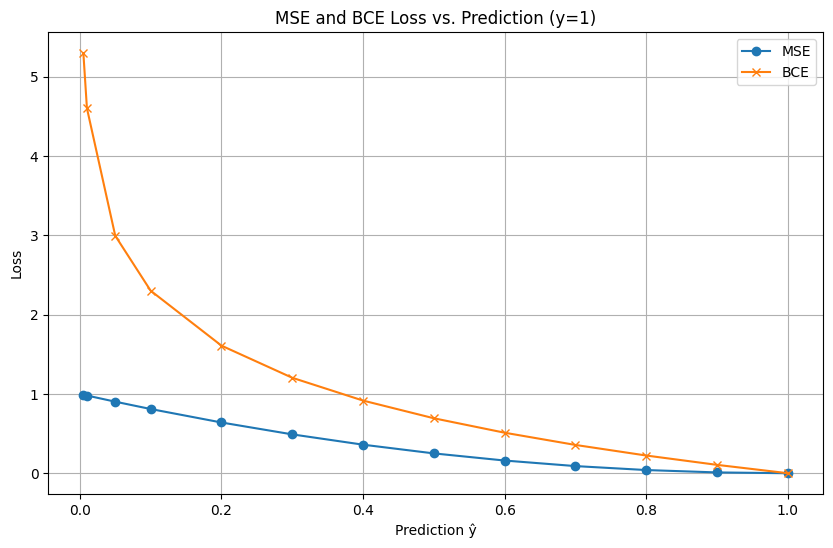

In [ ]:
# True value
y_true = 1

# Predictions
y_predictions = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Calculate MSE
mse_values = (y_true - y_predictions)**2

# Calculate BCE
# Avoid log(0) by adding a small epsilon
epsilon = 1e-15
bce_values = - (y_true * np.log(y_predictions + epsilon) + (1 - y_true) * np.log(1 - y_predictions + epsilon))

# Print the table
print("Table 2: MSE and BCE loss values for different predictions when y=1.")
print("True y=1 | Prediction ŷ | MSE        | BCE")
print("-" * 45)
for i in range(len(y_predictions)):
    print(f"1        | {y_predictions[i]:<12.3f} | {mse_values[i]:<10.6f} | {bce_values[i]:.6f}")

# Plot the loss functions
plt.figure(figsize=(10, 6))
plt.plot(y_predictions, mse_values, label='MSE', marker='o')
plt.plot(y_predictions, bce_values, label='BCE', marker='x')
plt.xlabel("Prediction ŷ")
plt.ylabel("Loss")
plt.title("MSE and BCE Loss vs. Prediction (y=1)")
plt.legend()
plt.grid(True)
plt.show()

##### **2. Selection of loss functions for each application**
**Application 1 - MSE <br>**
MSE is derived from the assumption that the residual errors follow a Gaussian distribution with constant variance. It penalizes large deviations more heavily because of the square term, which is desirable when we want to minimize significant prediction errors. Moreover, MSE produces smooth gradients, which makes optimization stable for continuous-value predictions.
<br>

**Application 2 - BCE** <br>
BCE is derived from the negative log-likelihood of the Bernoulli distribution, making it theoretically grounded for probabilistic classification tasks. It measures the distance between the predicted probability distribution and the true distribution. BCE penalizes confident but wrong predictions very strongly (e.g., predicting 0.99 when the true label is 0), which encourages the model to produce well-calibrated probabilities.
<br>
<br>

### 3 Data Pre-Processing
##### **1. Generating feature values**

/tmp/ipython-input-349576026.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sparse_signal[10] = np.random.randn(1) + 30


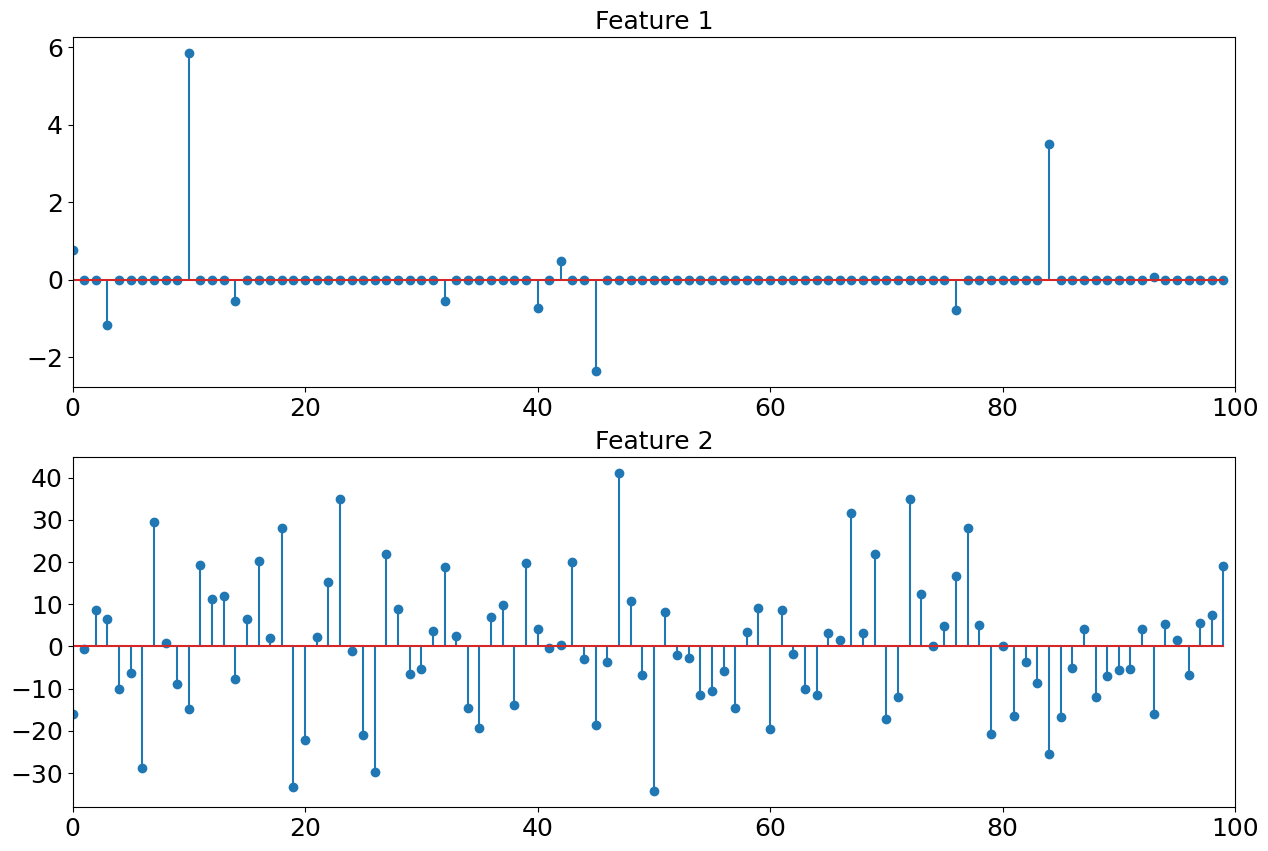

In [ ]:
def generate_signal(signal_length, num_nonzero):
  signal = np.zeros(signal_length)
  nonzero_indices = np.random.choice(signal_length, num_nonzero,
  replace=False)
  nonzero_values = 10*np.random.randn(num_nonzero)
  signal[nonzero_indices] = nonzero_values
  return signal

signal_length = 100 # Total length of the signal
num_nonzero = 10 # Number of non-zero elements in the signal
your_index_no = 220700

sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10)*2 + 10

if your_index_no % 10 == 0:
  sparse_signal[10] = np.random.randn(1) + 30
  sparse_signal=sparse_signal/5
  epsilon = np.random.normal(0, 15, signal_length )

#epsilon=epsilon[:, np.newaxis]
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.stem(sparse_signal)
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.stem(epsilon)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.show()

(a) Standard scaling

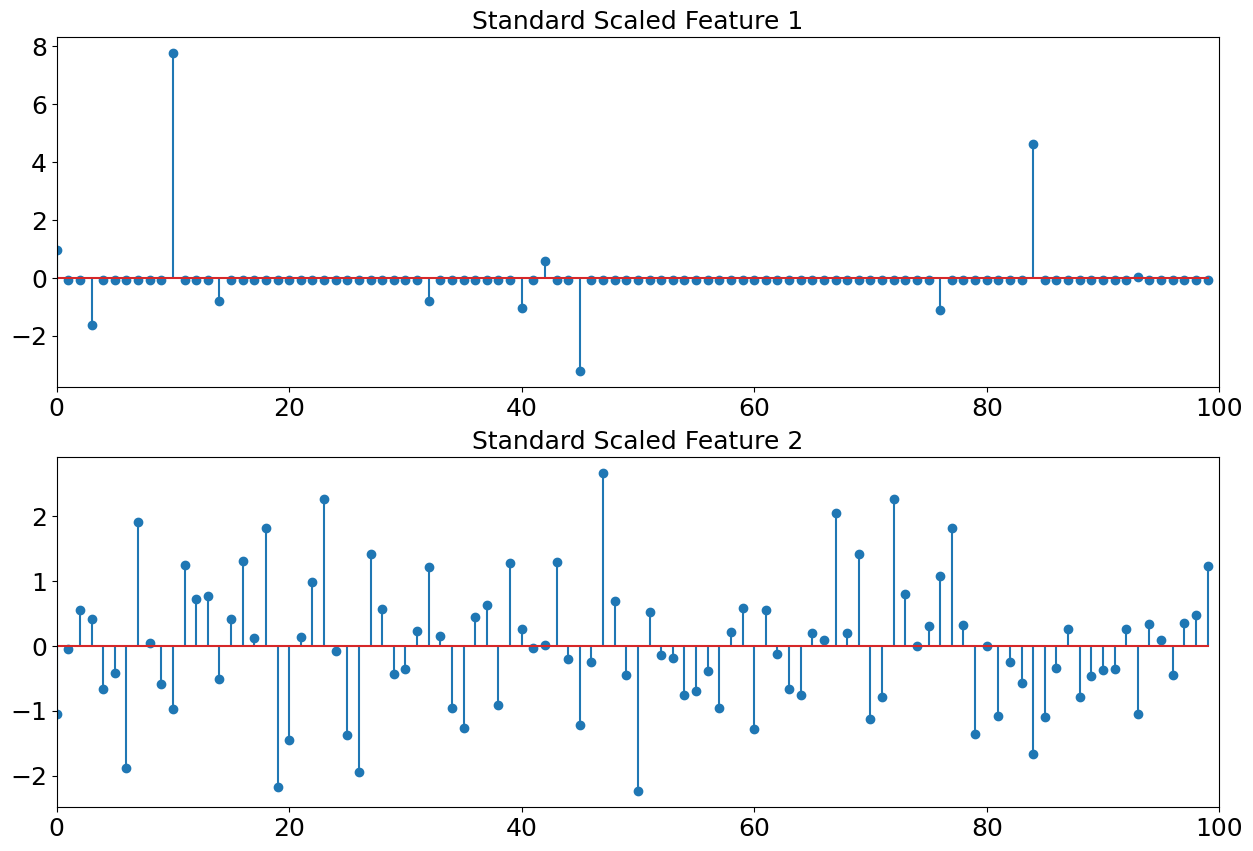

In [ ]:
from sklearn.preprocessing import StandardScaler

# Reshape the signals for StandardScaler
sparse_signal_reshaped = sparse_signal.reshape(-1, 1)
epsilon_reshaped = epsilon.reshape(-1, 1)

# Apply Standard Scaling
scaler_sparse = StandardScaler()
scaled_sparse_signal = scaler_sparse.fit_transform(sparse_signal_reshaped)

scaler_epsilon = StandardScaler()
scaled_epsilon = scaler_epsilon.fit_transform(epsilon_reshaped)

# Plot the scaled signals
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Standard Scaled Feature 1", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(scaled_sparse_signal)

plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Standard Scaled Feature 2", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(scaled_epsilon)

plt.show()

(b) Min-Max scaling

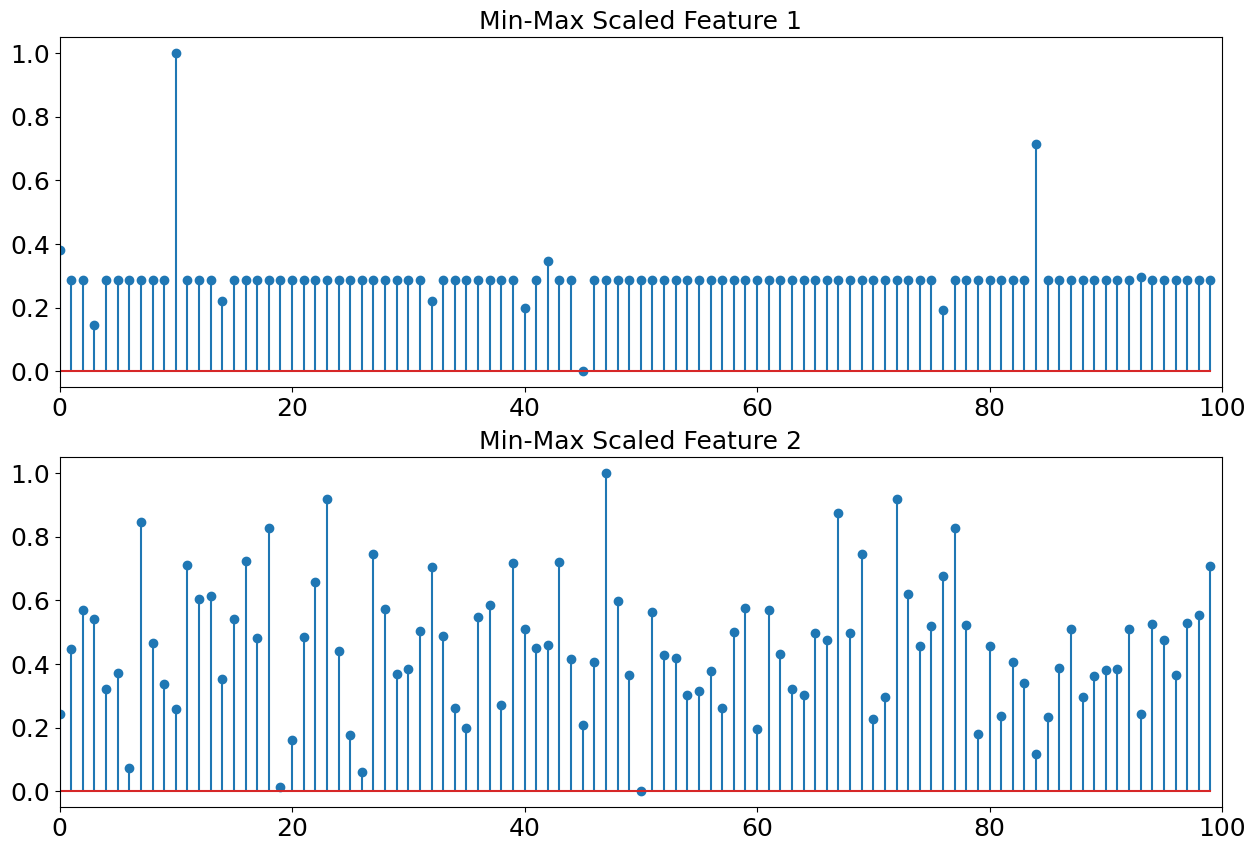

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Reshape the signals for MinMaxScaler
sparse_signal_reshaped = sparse_signal.reshape(-1, 1)
epsilon_reshaped = epsilon.reshape(-1, 1)

# Apply Min-Max Scaling
scaler_sparse_minmax = MinMaxScaler()
scaled_sparse_signal_minmax = scaler_sparse_minmax.fit_transform(sparse_signal_reshaped)

scaler_epsilon_minmax = MinMaxScaler()
scaled_epsilon_minmax = scaler_epsilon_minmax.fit_transform(epsilon_reshaped)

# Plot the scaled signals
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Min-Max Scaled Feature 1", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(scaled_sparse_signal_minmax)

plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Min-Max Scaled Feature 2", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(scaled_epsilon_minmax)

plt.show()

(c) Max Abs scaling

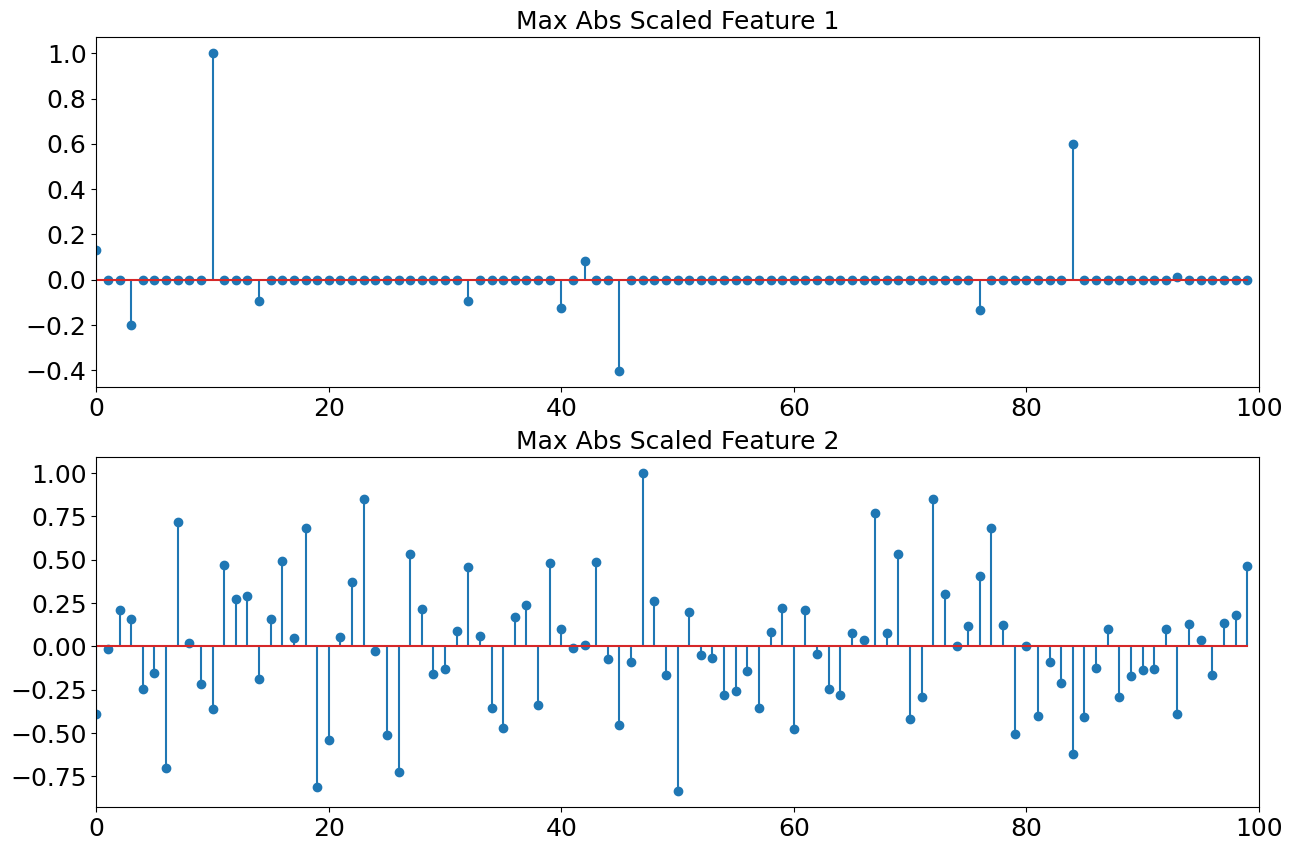

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

# Reshape the signals for MaxAbsScaler
sparse_signal_reshaped = sparse_signal.reshape(-1, 1)
epsilon_reshaped = epsilon.reshape(-1, 1)

# Apply Max Abs Scaling
scaler_sparse_maxabs = MaxAbsScaler()
scaled_sparse_signal_maxabs = scaler_sparse_maxabs.fit_transform(sparse_signal_reshaped)

scaler_epsilon_maxabs = MaxAbsScaler()
scaled_epsilon_maxabs = scaler_epsilon_maxabs.fit_transform(epsilon_reshaped)

# Plot the scaled signals
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Max Abs Scaled Feature 1", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(scaled_sparse_signal_maxabs)

plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Max Abs Scaled Feature 2", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(scaled_epsilon_maxabs)

plt.show()

**Selecting the best scaling method**
<br>
Feature 1 - Max-Abs Scaling
<br>
As feature 1 follows a sparse dustributuion, we want to keep zeros as zeros, keep the sign and avoid shifting of the mean. As max-abs scaling devide the values by the absolute maximum value of the range, it does not change the zeros, but only scale the non-zero values. Also, dividing by the absolute value keeps positive and negative spikes proportional to their real value. As this scales magnitudes into [-1,1] without shifting mean, this protects the sparse Nature.
<br>
<br>
Feature 2 - Standard Scaling<br>
As feature 2 follows a Gaussian distribution, we need to normalize the mean and variance for stability. As standard scaling centers the distribution to zero mean and scales the variance to 1, this keeps the statistical assumptions of Gaussian features protected.
